## Background
Java June is a company that owns coffee shops in a number of locations in Europe.
The company knows that stores with more reviews typically get more new customers. This is
because new customers consider the number of reviews when picking between two shops.
They want to get more insight into what leads to more reviews.
They are also interested in whether there is a link between the number of reviews and rating.
They want a report to answer these questions.


1. For every column in the data:
a. State whether the values match the description given in the table above.
b. State the number of missing values in the column
c. Describe what you did to make values match the description if they did not
match.
2. Create a visualization that shows how many stores were given each rating. Use the
visualization to:
a. State which category has the most number of observations
b. Explain whether the observations are balanced across categories
3. Describe the distribution of the number of reviews. Your answer must include a visualization that shows the distribution.
4. Describe the relationship between number of reviews and rating. Your answer must include a visualization to demonstrate the relationship.
5. The business wants to predict the number of reviews a store will get using the data provided. State the type of machine learning problem that this is (regression/classification/clustering).
6. Fit a baseline model to predict the number of reviews a store will get using the data provided. You must include your code.
7. Fit a comparison model to predict the number of reviews a store will get using the data provided. You must include your code.
8. Explain why you chose the two models used in parts 6 and 7.
9. Compare the performance of the two models used in parts 6 and 7, using any method suitable for the type of model. You must include your code.
10. Explain which model performs better and why.

In [1]:
#Data import and first look
import pandas as pd

data = pd.read_csv(r'C:\Users\MacBook\Desktop\Python Jupyter notebook\Associate practical exam sample\coffee.csv')
print(data.head())
print('\n')
print(data.info())

  Region             Place name   Place type  Rating  Reviews Price  \
0      C               Dim Kavu       Others     4.6    206.0    $$   
1      C                Коферум         Cafe     5.0     24.0    $$   
2      C       Кофейня Світ Чаю  Coffee shop     5.0     11.0    $$   
3      C       Кофейня Starcoff  Coffee shop     4.4    331.0    $$   
4      C  Кофейня "Friend Zone"  Coffee shop     5.0     12.0    $$   

   Delivery option Dine in option Takeout option  
0            False            NaN            NaN  
1            False            NaN           True  
2            False            NaN           True  
3            False           True           True  
4            False           True           True  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       2

In [13]:
#a) State whether the values match with the given description

print('Number of regions:',len(data.Region.unique())) # #Region should have from A - J -->10 --It matches
print('\n')
print('Categories in Place type')
print(data['Place type'].value_counts()) #Should be divided into categories--it matches
print('\n')
print('Min and max of rating -->',min(data['Rating']),',', max(data['Rating'])) #Max value should be 5 --it matches
print('\n')
print('Categories in Price')
print(data['Price'].value_counts()) #Should be divided into categories--it matches
print('\n')
print('Categories in Delivery option')
print(data['Delivery option'].value_counts()) #Should be either True or false --> it matches
print('\n')
print('Categories in Dine in option')
print(data['Dine in option'].value_counts()) #Should be either True or false --> Missing values should be FALSE...next step
print('\n')
print('Categories in Takeout option')
print(data['Takeout option'].value_counts())#Should be either True or false --> Missing values should be FALSE...next step
print('\n')
print('Categorical variables')
print(data.select_dtypes(['object','bool']).nunique())

Number of regions: 10


Categories in Place type
Coffee shop     97
Cafe            58
Others          25
Espresso bar    20
Name: Place type, dtype: int64


Min and max of rating --> 0.0 , 5.0


Categories in Price
$$     194
$$$      4
$        2
Name: Price, dtype: int64


Categories in Delivery option
False    165
True      35
Name: Delivery option, dtype: int64


Categories in Dine in option
True     140
False     60
Name: Dine in option, dtype: int64


Categories in Takeout option
True     144
False     56
Name: Takeout option, dtype: int64


Categorical variables
Region              10
Place name         187
Place type           4
Price                3
Delivery option      2
Dine in option       2
Takeout option       2
dtype: int64


In [3]:
#b) State the number of missing values in the column
print(data.isna().sum())

Region              0
Place name          0
Place type          0
Rating              2
Reviews             2
Price               0
Delivery option     0
Dine in option     60
Takeout option     56
dtype: int64


In [4]:
import numpy as np
#c) Handling missing values
data.Rating = data.Rating.fillna(0)
data.Reviews = data.Reviews.fillna(data.Reviews.median())
data['Dine in option'] = data['Dine in option'].fillna(False)
data['Takeout option'] = data['Takeout option'].fillna(False)

print(data.isna().sum())

Region             0
Place name         0
Place type         0
Rating             0
Reviews            0
Price              0
Delivery option    0
Dine in option     0
Takeout option     0
dtype: int64


In [5]:
#Summary so far
#We needed to be sure that we have the data as the documentation said it was
#Then we needed to manage the missing values as requested

0.0     2
3.9     2
4.0     2
4.1     2
4.2     2
4.3     6
4.4    12
4.5    22
4.6    47
4.7    39
4.8    18
4.9    25
5.0    21
Name: Rating, dtype: int64


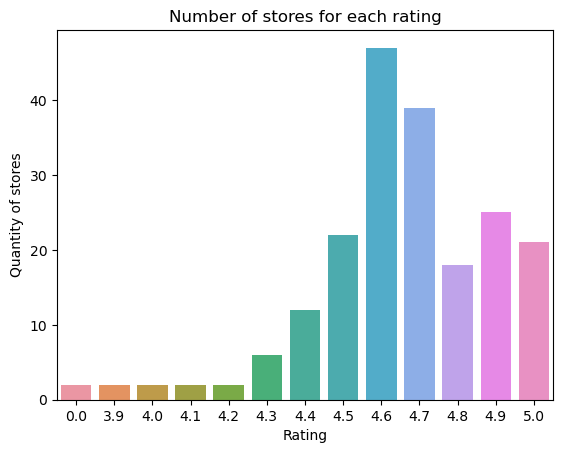

In [6]:
#Create a visualization that shows how many stores were given each rating.
print(data['Rating'].value_counts().sort_index())


import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Rating',data=data)
plt.title('Number of stores for each rating')
plt.ylabel('Quantity of stores')
plt.show()

#As it can be seen, the category that had more ratings was 4.6 with 47 stores.
# Are the observations balanced across categories ??

200 197


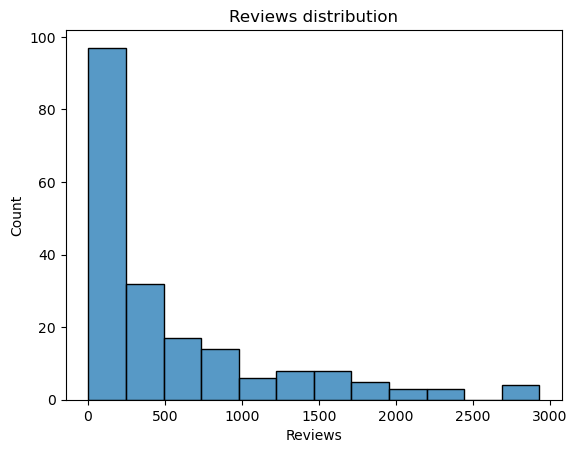

In [7]:
#Plot the distribution of number of reviews
data_without_outliers = data[(data['Reviews'] < 17000) & (data['Rating'] != 0)]
print(len(data),len(data_without_outliers))

sns.histplot(data=data_without_outliers,x='Reviews')
plt.title('Reviews distribution')
plt.show()
#As it can be seen, most of the restaurants have less than 500. It seems that there is a tendency, when Reviews increase, 
#the number of restaurants tend to be less. 

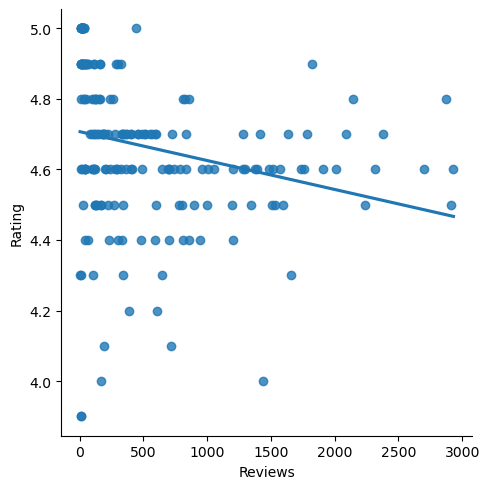

Correlation coefficient:  -0.243497151364041


In [8]:
#Relationship between number of reviews and rating
sns.lmplot(data=data_without_outliers, x='Reviews',y='Rating',ci=None)
plt.show()

print('Correlation coefficient: ',data_without_outliers['Reviews'].corr(data_without_outliers['Rating']))

#The plot and the correlation function shows a negative correlation value. However, since it is -0.2, it can be 
#considered as a low correlation

In [9]:
#The business wants to predict the number of reviews a store will get using the data provided.
#This can be done with a regression model. However, linear regression should be selected since the output(reviews) is numeric.

#Important: Categorical values should be transformed into dummies for better performance
features = data_without_outliers.drop(columns = ['Reviews','Place name'])
X = pd.get_dummies(features, columns = ['Place type','Price','Region','Delivery option','Dine in option','Takeout option'])
y= data_without_outliers[['Reviews']]
print(X)

     Rating  Place type_Cafe  Place type_Coffee shop  Place type_Espresso bar  \
0       4.6                0                       0                        0   
1       5.0                1                       0                        0   
2       5.0                0                       1                        0   
3       4.4                0                       1                        0   
4       5.0                0                       1                        0   
..      ...              ...                     ...                      ...   
195     4.6                0                       0                        0   
196     4.3                1                       0                        0   
197     4.6                1                       0                        0   
198     4.7                0                       1                        0   
199     4.3                1                       0                        0   

     Place type_Others  Pri

In [10]:
#Baseline model--> Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

#print(reg.score(X_test,y_test))
mse_reg = MSE(y_test,y_pred)
rmse = mse_reg ** (1/2)
print(rmse)


544.1589356884243


In [11]:
#Comparison model --> Regression tree
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth = 4, min_samples_leaf=0.1, random_state=42)
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)

mse_dt = MSE(y_test,dt_pred)
rmse_dt = mse_dt ** (1/2)
print(rmse_dt)


529.0602024115186


In [12]:
#Comparison model --> Random forest regressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=400, min_samples_leaf=0.12,random_state=42)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
rmse_test = MSE(y_test, rf_pred) ** (1/2)
print(rmse_test)


C:\Users\MacBook\AppData\Local\Temp\ipykernel_13296\545237294.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


552.1434170577865


 If we need to choose a model by usign the RMSE, then the regression tree would be better 
since a lower value means a lower distance between the predicted values and the actual values